# Yenumula Pavan Gopal Mourya
# DAV Assignement-5
# 202051208

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.mosaicplot import mosaic
from joypy import joyplot #!pip install joypy
import squarify # pip install squarify
import plotly.express as px # pip install plotly
from itertools import product

# Task :

### Merging the above two dataframes and plotting any two plots discussed in the class:
#### 1) Mapped Pie Plot ( Not inbuilt we have to write code by ourselves to plot this plot) 
#### 2) Mosaic Plot ( We will be making use of plotly library)
#### 3) Tree Map
### Note : All of this plotting techniques or tools are specified for mapped data or hierarchial data

In [2]:
Egg_df=pd.read_csv('Egg_Production_2007_2012.csv')
milk_df=pd.read_csv('Milk_Production_2007_2012.csv')

In [3]:
print(Egg_df.shape)
print(milk_df.shape)

# Why the shape of merged dataframe is not (36,11) ?

# Explanation : Two reasons

# 1) The names are different in both of the dataframe in one : it's Dadra and in other it's Dadar
# if Egg_df['States/Uts']=='Dadra & Nagar Haveli':
#     Egg_df['States/Uts']='Dadar & Nagar Haveli'

# 2) The total is named different in both of them . (Different names for summing up in both)
# ANy way don't need it much . So, that's why I am discarding it.

(36, 6)
(36, 6)


In [4]:
Egg_df.at[30,'States/Uts']='Dadar & Nagar Haveli'
# We have seen in the previous assignement that Dadar & Nagar Haveli is different in both the dataframe . So, by default it 
# was neglected . So, we are renaming to include it in the merged dataframe
# Egg_df=Egg_df[:-2]
Egg_df=Egg_df[:-1]
# Egg_df

In [5]:
milk_df=milk_df[:-1]

In [6]:
Egg_df.columns=milk_df.columns
Egg_df.set_index('States/Uts',inplace=True)
milk_df.set_index('States/Uts',inplace=True)
print()

In [7]:
# Now let's create multicolumns for both then let's merge them
Egg_df.columns=pd.MultiIndex.from_product([['Egg'], Egg_df.columns])
milk_df.columns=pd.MultiIndex.from_product([['Milk'], milk_df.columns])

In [8]:
Egg_df.head()
milk_df.head()

Milk                                
                  2007-08 2008-09 2009-10 2010-11 2011-12
States/Uts                                               
Andhra Pradesh       8925    9570   10429   11203   12088
Arunachal Pradesh      32      24      26      28      22
Assam                 752     753     756     790     796
Bihar                5783    5934    6124    6517    6643
Chhattisgarh          866     908     956    1029    1119

In [9]:
merged_df = pd.merge(milk_df,Egg_df, on='States/Uts')
merged_df.head()

Milk                                     Egg          \
                  2007-08 2008-09 2009-10 2010-11 2011-12 2007-08 2008-09   
States/Uts                                                                  
Andhra Pradesh       8925    9570   10429   11203   12088  175884  183446   
Arunachal Pradesh      32      24      26      28      22     394     361   
Assam                 752     753     756     790     796    4910    4659   
Bihar                5783    5934    6124    6517    6643   10707   10740   
Chhattisgarh          866     908     956    1029    1119    9184    9738   

                                           
                  2009-10 2010-11 2011-12  
States/Uts                                 
Andhra Pradesh     193958  201277  212103  
Arunachal Pradesh     380     407     419  
Assam                4671    4707    4705  
Bihar               11002    7446    7552  
Chhattisgarh        10520   12454   12984

In [10]:
merged_df1=merged_df.stack(level=0)
print(merged_df1)

                        2007-08  2008-09  2009-10  2010-11  2011-12
States/Uts                                                         
Andhra Pradesh    Egg    175884   183446   193958   201277   212103
                  Milk     8925     9570    10429    11203    12088
Arunachal Pradesh Egg       394      361      380      407      419
                  Milk       32       24       26       28       22
Assam             Egg      4910     4659     4671     4707     4705
...                         ...      ...      ...      ...      ...
Delhi             Milk      445      450      466      480      502
Lakshadweep       Egg       128      135      138      138      140
                  Milk        2        2        2        2        2
Puducherry        Egg       137      112      113      114      116
                  Milk       47       46       46       47       45

[70 rows x 5 columns]


In [11]:
merged_df1
merged_df1= merged_df1.rename_axis(['States/Uts','Item'])
merged_df1

2007-08  2008-09  2009-10  2010-11  2011-12
States/Uts        Item                                             
Andhra Pradesh    Egg    175884   183446   193958   201277   212103
                  Milk     8925     9570    10429    11203    12088
Arunachal Pradesh Egg       394      361      380      407      419
                  Milk       32       24       26       28       22
Assam             Egg      4910     4659     4671     4707     4705
...                         ...      ...      ...      ...      ...
Delhi             Milk      445      450      466      480      502
Lakshadweep       Egg       128      135      138      138      140
                  Milk        2        2        2        2        2
Puducherry        Egg       137      112      113      114      116
                  Milk       47       46       46       47       45

[70 rows x 5 columns]

In [12]:
merged_df1["total"] = merged_df1.sum(axis=1)
total=merged_df1["total"]
# print(total)
total=total.iloc[10:18].unstack()
# total
print(total)
total_array=total.values.T
print(total_array)

Item                 Egg   Milk
States/Uts                     
Goa                  747    296
Gujarat            61231  44279
Haryana           198420  30121
Himachal Pradesh    4891   5226
[[   747  61231 198420   4891]
 [   296  44279  30121   5226]]


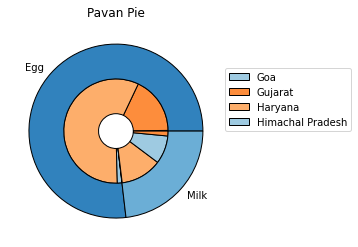

In [13]:
fig, ax = plt.subplots()
size = 0.4
cmap=plt.get_cmap("tab20c")
Exterior = cmap([0,1])
Interior = cmap([2,5,6])
outerlabels=total.columns.tolist()
innerlabels=total.index.tolist()
l2=ax.pie(total_array.flatten(), radius=1-size, colors=Interior,wedgeprops=dict(width=size, edgecolor='black'))
l1=ax.pie(total_array.sum(axis=1), radius=1, colors=Exterior, labels =outerlabels,wedgeprops=dict(width=size, edgecolor='black'))
ax.legend(innerlabels,loc=(1,0.5))
ax.set(aspect="equal", title='Pavan Pie')
plt.show()


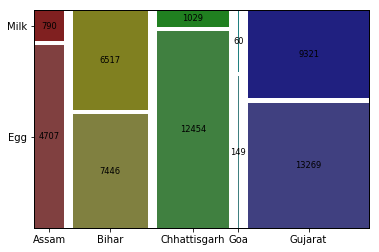

In [14]:
total=merged_df1["2010-11"]
total=total.iloc[4:14]
dic= total.to_dict()
labelizer = lambda k:dic[k]
mosaic(total,labelizer =labelizer,gap=0.03)
plt.show()

In [16]:
DataFrame = merged_df1.reset_index()
DataFrame=DataFrame[4:24]
DataFrame
# fig = px.treemap(DataFrame, path=["States/Uts","Item"], values='total')
# fig.show()

,States/Uts,Item,2007-08,2008-09,2009-10,2010-11,2011-12,total
4,Assam,Egg,4910,4659,4671,4707,4705,23652
5,Assam,Milk,752,753,756,790,796,3847
6,Bihar,Egg,10707,10740,11002,7446,7552,47447
7,Bihar,Milk,5783,5934,6124,6517,6643,31001
8,Chhattisgarh,Egg,9184,9738,10520,12454,12984,54880
9,Chhattisgarh,Milk,866,908,956,1029,1119,4878
10,Goa,Egg,152,149,148,149,149,747
11,Goa,Milk,58,59,59,60,60,296
12,Gujarat,Egg,8256,12675,12762,13269,14269,61231
13,Gujarat,Milk,7911,8386,8844,9321,9817,44279
